#### Project : Heart Disease Data Insights and Predictions


#### Problem Statement

In Modern Era, Heart Disease is one of the major concerns for society today due to unhealthy eating habits and sedentary life style.According to WHO more than 10 million people die due to Heart diseases every single year around the world. A healthy lifestyle and earliest detection are only ways to prevent the heart related diseases.
The major challenge in heart disease is its detection.There are many instruments or clinical test available which can predict heart disease but either they are expensive or are not efficient to determine  the probability  of heart disease in human. Early detection of cardiac diseases can decrease the mortality rate and overall complications. However, it is not possible to monitor patients every day in all cases accurately
and consultation of a patient for 24 hours by a doctor is not available since it requires more time and expertise.
Since we have a good amount of data in today’s world, we can find hidden insights using data analysis technique and use various machine learning algorithms to predict whether the person is suffering from heart disease or not.Due to the fast and accurate classification of Heart Disease, doctors will provide proper treatment to the patients and save their life.



#### Objective : 

- To examine trends & correlations within our data

- Determine which features are  important with respect to heart disease.

- To compare different Classification Machine learning algorithms and find the efficient one for considering as Heart Disease classifer.


#### Data source : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


- This data contains clinical attributes about the patient 

# Workflow :

-  Step 1: Basic Understanding of Data 
          - 1.1 Importing required libraries
          - 1.2 Loading Data Set
          - 1.3 Shape of Data
          - 1.4 Basic Understanding of Data
          - 1.5 Column types and descriptions
-  Step2 : Cleaning of Data 
           - 2.1 Checking missing values               
- Step 3: Data Analysis and Insights 
          - 3.1 Correlation
          - 3.2 Insights
- Step 4 : Data Preparation
           - 4.1 Skewness and Distribution of features and target
           - 4.2 Detecting outliers using describe() and Boxplot 
           - 4.3 outliers Removal
           - 4.4 Relationship of features with target using scatterplot
           - 4.5 Checking Multicollinearity
           - 4.6 Scaling 
- Step 5: Modelling and Model evaluation
- Step 6 : Conclusion
 
 
               

### Step 1 : Basic Understanding of Data

#### 1.1 Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

#### 1.2  Loading Data Set

In [2]:
df=pd.read_csv("D:\\python_datascience\\data sets\\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### 1.3 Getting shape of data

In [3]:
df.shape

(1025, 14)

#### 1.4 Basic information of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### 1.5   DataTypes of columns and their Description

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

 all columns are of numeric type 
 
 
 here ,  target column : target(dependent variable) 
 
 
and rest are features (independent variables)

#### Columns descriptions as follows 

- age : age in years
- sex : (1 = male; 0 = female)
- chest pain type (4 values) 
- resting blood pressure : resting blood pressure (in mm Hg on admission to the hospital)
- serum cholestoral in mg/dl 
- fasting blood sugar > 120 mg/dl : (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2) : resting electrocardiographic results
- thalach: maximum heart rate achieved  
- exang : exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 1 = Normal 2= fixed defect  3 = reversable defect
- target : 1 or 0



### Step 2: Data Cleaning

#### 2.1 Checking missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data has no missing values

### Step 3:  Data Analysis and Insights 

In [7]:
dff=df.copy() ### making the copy of df and save it to dff and we use dff for data analysis
dff.head()  ### viewing top 5 rows of dff

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Checking  types of all columns of dff again

In [8]:
dff.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### 3.1 Correlation 

<AxesSubplot:>

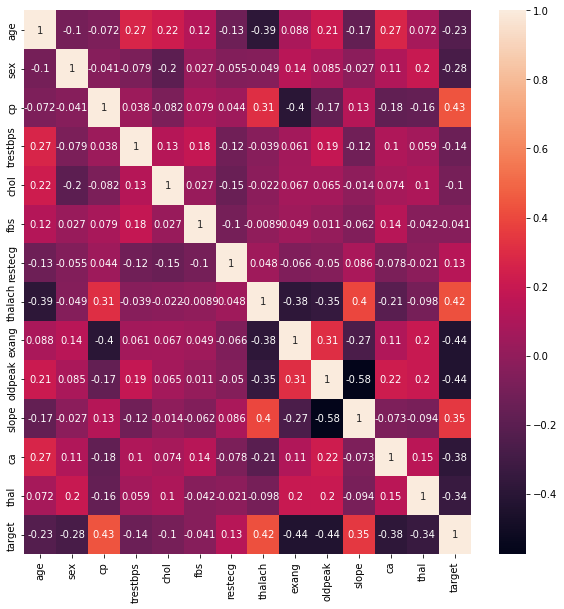

In [9]:
plt.figure(figsize=(10,10))
cor=dff.corr()
sns.heatmap(cor,annot=True)

#### From above output , We can see 

There are Four features( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target .
Rest of the features are negatively correlated with target but none of them found to be strongly correlated with target.

- Since there is a positive correlation between chest pain (cp) & target This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. 

- Since there is negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.



#### Convert the following list of columns into categorical for data analysis

In [10]:

cat_list=["sex","cp","fbs","restecg","exang","slope","ca","thal"]
for col in cat_list:
    dff[col]=dff[col].astype("object")

### Now we will analyse each column one by one 

In [11]:
### checking unique values of target
dff["target"].unique()

array([0, 1], dtype=int64)

#### for readibilty, we decode the values of target as 1 : heart disease and 0 : Not heart disease

In [12]:
dff["target"].replace({0:"Not Heart disease",1:"Heart disease"},inplace=True)

#### 3.2 Insights 

#### How many persons have heart disease or not?

In [13]:
dff["target"].value_counts()

Heart disease        526
Not Heart disease    499
Name: target, dtype: int64

#### seems the target variable is balance means data is balanced in term of class

#### Visually we can represent it as :

<AxesSubplot:xlabel='target', ylabel='count'>

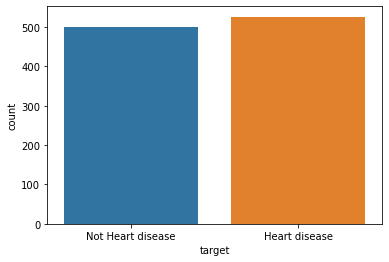

In [14]:
sns.countplot(x="target",data=dff)

#### How many males and females have heart disease 

In [15]:
## first we decode the values of male and female as below: 
dff["sex"].replace({0:"female",1:"male"},inplace=True)

<AxesSubplot:xlabel='target', ylabel='count'>

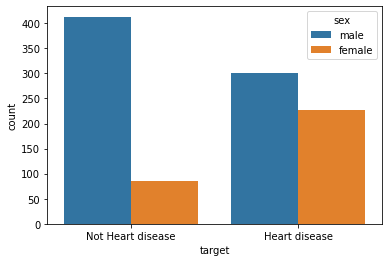

In [16]:
sns.countplot(x="target",data=dff,hue="sex")

#### Insights :
males were more effected by heart disease than females 

In [17]:
### checking unique values of age column
dff["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

#### What was the minimum,maximum and average age of the persons having heart disease 

In [18]:
dff.groupby(["target"])["age"].agg(["max","min","mean"])

,max,min,mean
target,,,
Heart disease,76,29,52.408745
Not Heart disease,77,35,56.569138


#### Adding age categories to dff

In [19]:
dff['age_bins'] = pd.cut(x=dff['age'], bins=[20,40, 55, 100],labels=["young","middle","old"])
dff

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,Not Heart disease,middle
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,Not Heart disease,middle
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,Not Heart disease,old
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,Not Heart disease,old
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,Not Heart disease,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,Heart disease,old
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,Not Heart disease,old
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,Not Heart disease,middle
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,Heart disease,middle


#### Which age's people were more effected by heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

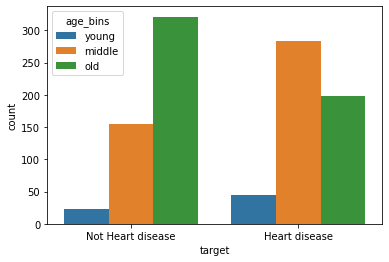

In [20]:
sns.countplot(x="target",data=dff,hue="age_bins")

#### Insight :

even young people found to have heart disease and middle age were more effected by it 

In [21]:
## checking unique values of cp
dff["cp"].unique()

array([0, 1, 2, 3], dtype=object)

### cp: chest pain

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

#### How chest pain is related with target

<AxesSubplot:xlabel='cp', ylabel='count'>

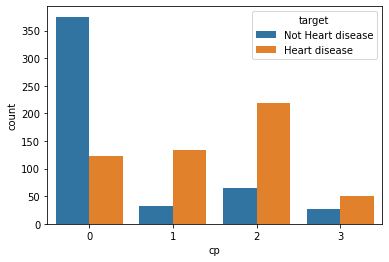

In [22]:
sns.countplot(x="cp",data=dff,hue="target")

#### Insights:

The persons having Non-anginal  chest pain are more likely to have heart disease 

#### trestbps: resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

#### What was the min,maximum and average bloodpressure  found in heart pateint

In [23]:
dff.groupby(["target"])["trestbps"].agg(["min","max",'mean'])

,min,max,mean
target,,,
Heart disease,94,180,129.245247
Not Heart disease,100,200,134.106212


#### Visual representation of average blood pressure found in heart patient or not

<AxesSubplot:xlabel='target', ylabel='trestbps'>

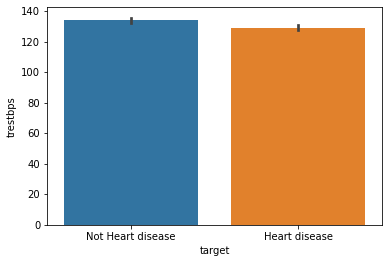

In [24]:
sns.barplot(x="target",y="trestbps",data=dff)

#### The persons having bp around 130 are more likely to have heart disease

#### How bp effects the heart patient

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


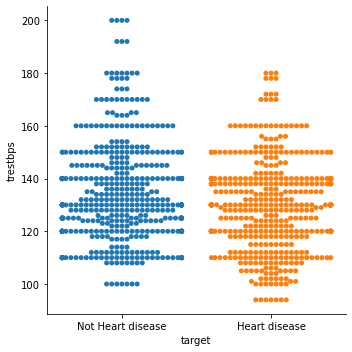

In [25]:
sns.catplot(x="target",y="trestbps",data=dff,kind="swarm")

#### How sex is impacting heart patient having bp or not

<AxesSubplot:xlabel='target', ylabel='trestbps'>

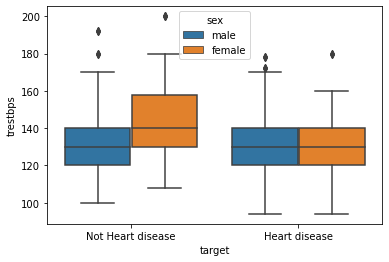

In [26]:
sns.boxplot(x="target",y="trestbps",data=dff,hue="sex")

#### gender is not impacting  on heart disease pateints whose bp is around 120-140 so bp is seems neutral for both males and females

#### chol :  serum cholestoral in mg/dl


serum = LDL + HDL + .2 * triglycerides

above 200 is cause for concern

#### How cholestrol is impacting heart disease

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


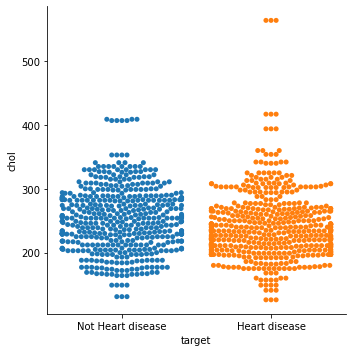

In [27]:
sns.catplot(x="target",y="chol",data=dff,kind="swarm")

#### Insights:

The persons having cholestrol around 200-300 are more likely to have heart disease

#### What was the min,max and average cholestrol 

In [28]:
dff.groupby(["target"])["chol"].agg(["max","min","mean"])

,max,min,mean
target,,,
Heart disease,564,126,240.979087
Not Heart disease,409,131,251.292585


#### how many people were deadly effected by cholestrol (i.e >200)

In [29]:
chol_level=len(dff[(dff["chol"]>200)&(dff["target"]=="Heart disease")])
persons_high_chol=chol_level*100/526
persons_high_chol

81.1787072243346

#### 81% of people having chol greater than 200

<AxesSubplot:xlabel='target', ylabel='chol'>

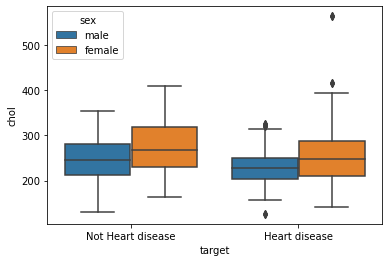

In [30]:
sns.boxplot(x="target",y="chol",data=dff,hue="sex")

#### Insight :

mostly females are more likely to have heart disease whose cholestrol level is around 200- 300

#### Which age persons are more likely to have heart disease with respect to their cholestrol 

<AxesSubplot:xlabel='target', ylabel='chol'>

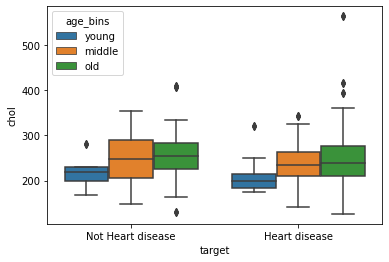

In [31]:
sns.boxplot(x="target",y="chol",data=dff,hue="age_bins")

#### Insight:
old age were found to have cholestrol range around 200 -300 are more likely to have heart disease

#### fbs : fasting blood sugar

In [32]:
dff["fbs"].unique()

array([0, 1], dtype=object)

In [33]:
## decoding the values of fbs
dff["fbs"].replace({0:"no sugar",1:"sugar"},inplace=True)

####  How fasting sugar is related with heart disease

<AxesSubplot:xlabel='fbs', ylabel='count'>

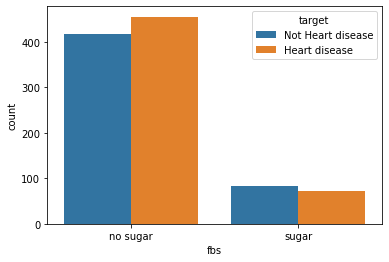

In [34]:
sns.countplot(x="fbs",data=dff,hue="target")

#### sugar is not effected the  the heart disease

### restecg:resting electrocardiographic results

--- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy

#### How resting electrocardiographic relates with target

<AxesSubplot:xlabel='restecg', ylabel='count'>

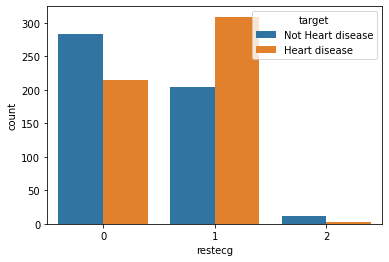

In [35]:
sns.countplot(x="restecg",data=dff,hue="target")

###  Insight:
The persons having ST-T wave abnormality resting electrocardiographic are more likely to have heart disease

### thalach : The person’s maximum heart rate achieved

#### How maximum heart rate is related with heart disease

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


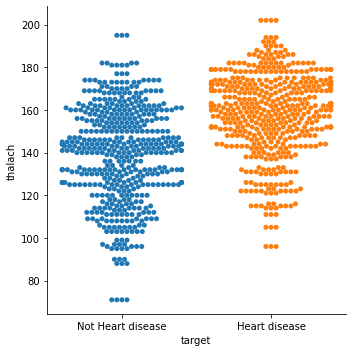

In [36]:
sns.catplot(x="target",y="thalach",data=dff,kind="swarm")

#### The persons having heart rate greater than 140 are more likely to have heart disease

#### What is the average maximum heart rate a person having heart disease

<AxesSubplot:xlabel='target', ylabel='thalach'>

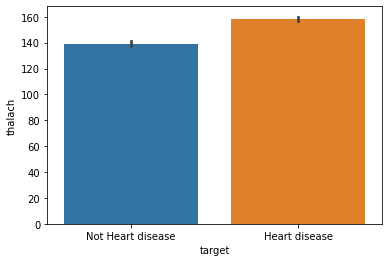

In [37]:
sns.barplot(x="target",y="thalach",data=dff)

#### Insight 150 thalch

#### In Which age factor average heart rate acheived more

Text(0.5, 1.0, 'maximum heart rate achieved V/S Target')

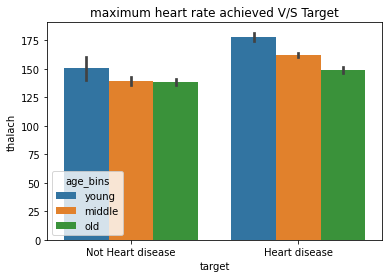

In [38]:
sns.barplot(x="target",y="thalach",data=dff,hue="age_bins")
plt.title("maximum heart rate achieved V/S Target")

#### Young person having heart disease got maximum heart rate achieved

#### exang: Exercise induced angina (1 = yes; 0 = no)

In [39]:
### decoding
dff["exang"].replace({0:"no",1:"yes"},inplace=True)

### Relation between Exercise induced angina and target

Text(0.5, 1.0, 'maximum heart rate acheived V/S target')

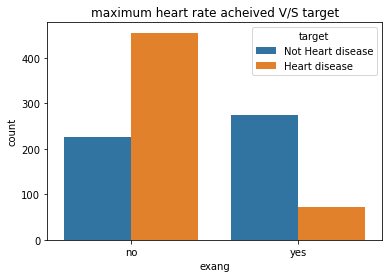

In [40]:
sns.countplot(x="exang",data=dff,hue="target")
plt.title("maximum heart rate acheived V/S target")

### Insights:
The persons having Exercise induced angina are less likely to have heart disease

#### oldpeak : ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot

In [41]:
dff["oldpeak"].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

#### What is the average oldpeak value 

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

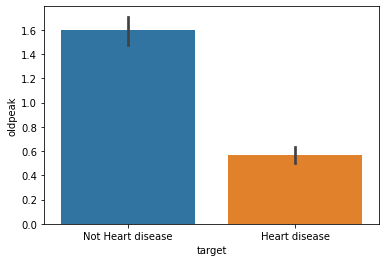

In [42]:
sns.barplot(x="target",y="oldpeak",data=dff)

### Insight :
The persons having heart disease are likely to have old peak value is 0.6

### thal : A blood disorder called thalassemia Value

In [43]:
dff["thal"].unique()

array([3, 2, 1, 0], dtype=object)

0: NULL (dropped from the dataset previously)

Value 1: normal blood flow

Value 2: fixed defect (no blood flow in some part of the heart)

Value 3: reversible defect (a blood flow is observed but it is not normal)

Text(0.5, 1.0, 'thalassemia  acheived V/S target')

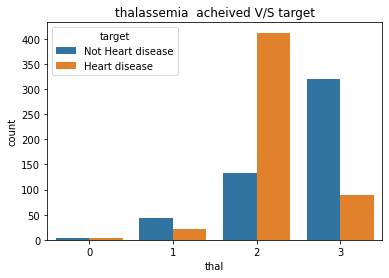

In [44]:
sns.countplot(x="thal",data=dff,hue="target")
plt.title("thalassemia  acheived V/S target")

#### Insight :
fixed defect type thalessemia are more effected by heart disease

### Step 4: Data Preparation


#### 4.1 Checking skewness and distributions of the data columns 

In [45]:
## skewness 
df.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

 some columns are positively skewed and some are negatively skewed 

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

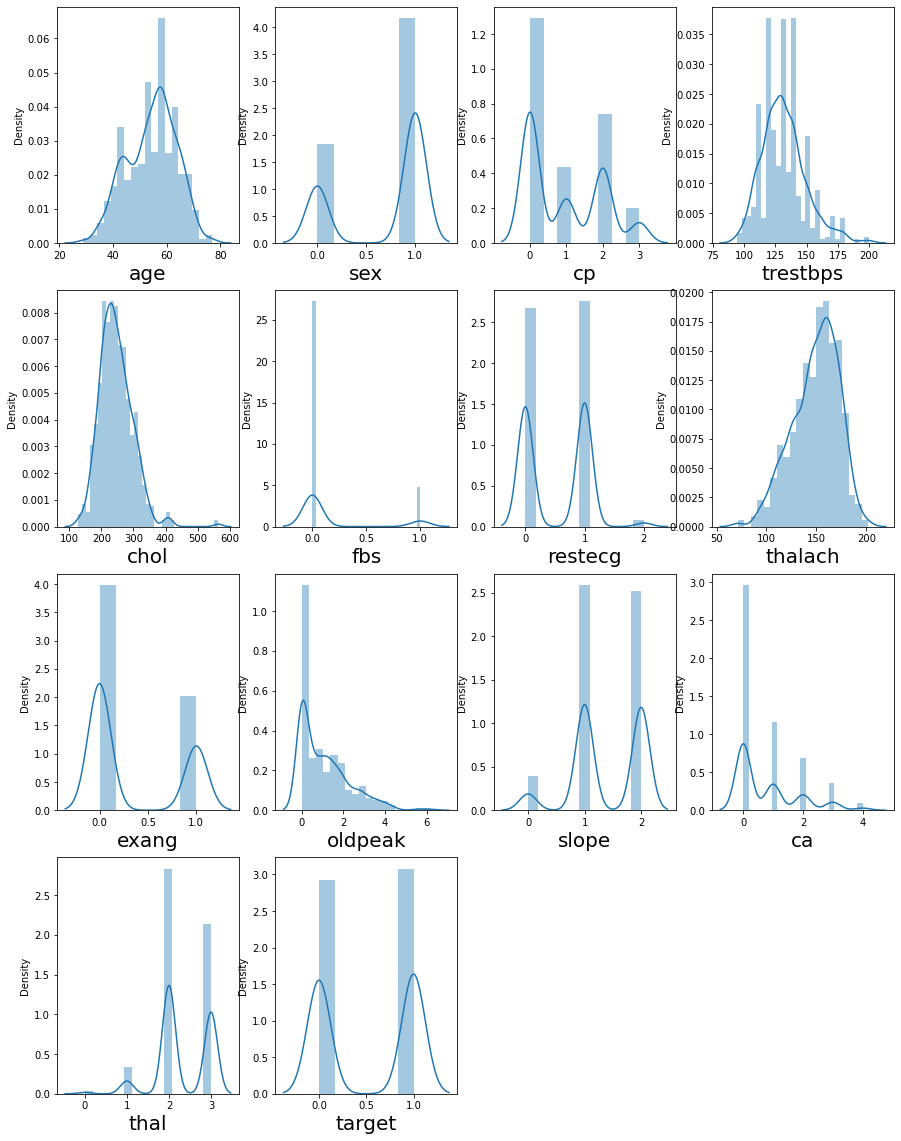

In [46]:
## checking distributions
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<15 : ## 14 columns in data 
        plt.subplot(4,4,plotnumber)## 4 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
        

from above output We can see there is some skewness in the data and means data is not 100% normally distributed




#### 4.2 Detecting outliers  using describe() function and boxplot

In [47]:
## using describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


from above output we can see there is a big difference in chol 75% to max (275 to 564) similarly we can see in thalch,trestbps so it indicated there is an outliers 

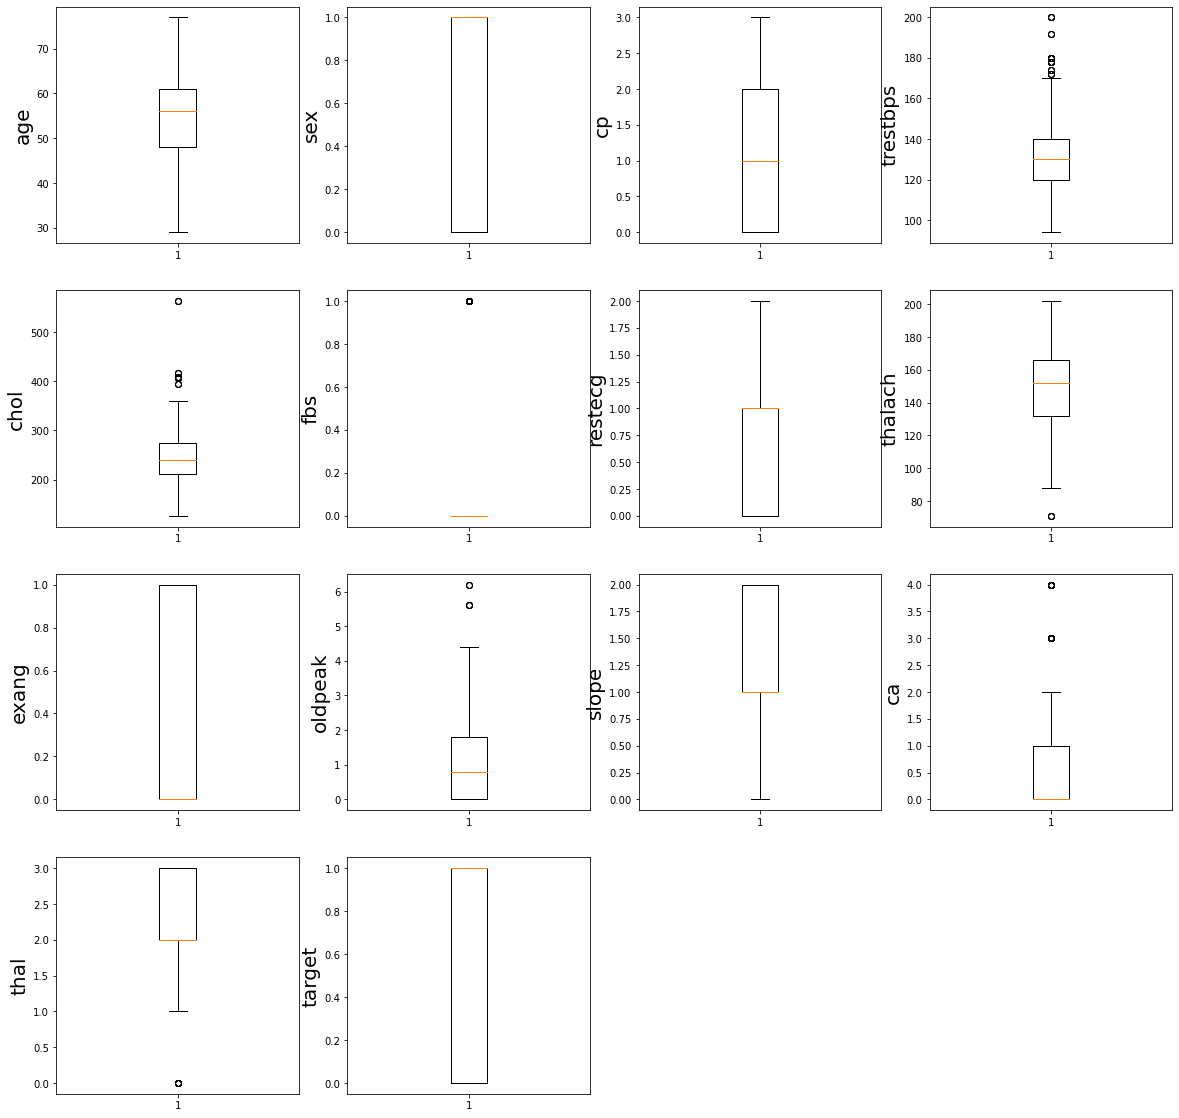

In [48]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in df.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### 4.3 Outliers removal 
Removing outliers from column trestbps

In [49]:
data_cleaned=pd.DataFrame()

IQR_upper_limit for column trestbps : 170
IQR_lower_limit for column trestbps : 90
outliers on right side in trestbps is 
 29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x20efa13f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20efa13fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x20efa13f310>],
 'medians': [<matplotlib.lines.Line2D at 0x20efb271160>],
 'fliers': [<matplotlib.lines.Line2D at 0x20efb271430>],
 'means': []}

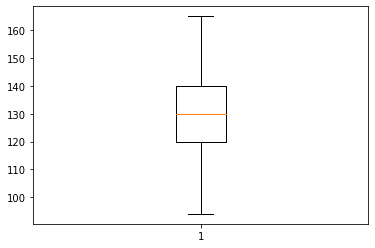

In [50]:
q3=df["trestbps"].quantile(q=0.75)
q1=df["trestbps"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column trestbps :",IQR_upper_limit)
print("IQR_lower_limit for column trestbps :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=df[df["trestbps"]>IQR_upper_limit]
print("outliers on right side in trestbps is \n",k1["trestbps"],"\n")
data_cleaned=df[df["trestbps"]<IQR_upper_limit]
plt.boxplot(data_cleaned["trestbps"])

### now checking  again outliers in rest of the columns 

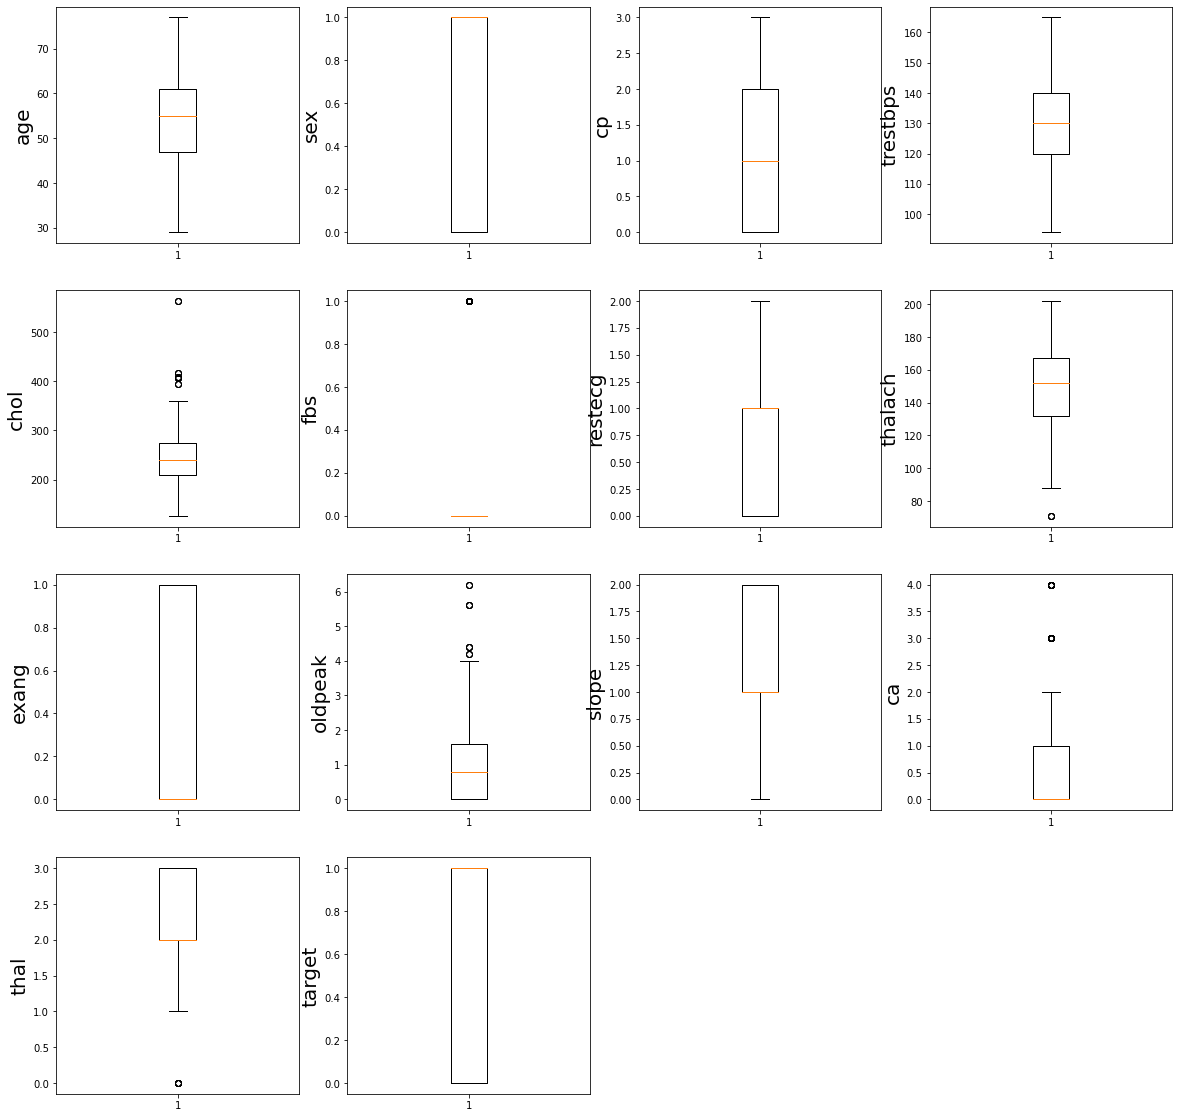

In [51]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data_cleaned.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(data_cleaned[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### removing outliers from chol columns

IQR_upper_limit for column chol : 371
IQR_lower_limit for column chol : 111
outliers on right side in chol is 
 123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x20efba7c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20efba7cc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x20efba7c520>],
 'medians': [<matplotlib.lines.Line2D at 0x20efba89250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20efba894c0>],
 'means': []}

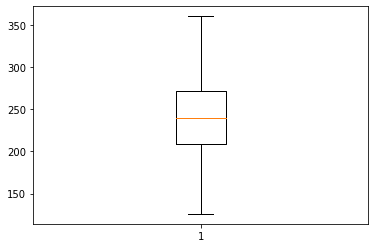

In [52]:
q3=data_cleaned["chol"].quantile(q=0.75)
q1=data_cleaned["chol"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column chol :",IQR_upper_limit)
print("IQR_lower_limit for column chol :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=data_cleaned[data_cleaned["chol"]>IQR_upper_limit]
print("outliers on right side in chol is \n",k1["chol"],"\n")
data_cleaned=data_cleaned[data_cleaned["chol"]<IQR_upper_limit]
plt.boxplot(data_cleaned["chol"])

### removing outliers from oldpeak column

IQR_upper_limit for column oldpeak : 4
IQR_lower_limit for column oldpeak : -2
outliers on right side in oldpeak is 
 6       4.4
13      4.2
54      5.6
55      5.6
69      6.2
150     4.4
393     6.2
482     4.2
526     6.2
613     5.6
661     4.4
787     4.2
833     5.6
1013    4.4
Name: oldpeak, dtype: float64 



{'whiskers': [<matplotlib.lines.Line2D at 0x20efb23e700>,
 'caps': [<matplotlib.lines.Line2D at 0x20efb8b4e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20efb23ebb0>],
 'medians': [<matplotlib.lines.Line2D at 0x20efb8b40d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20efb8b4cd0>],
 'means': []}

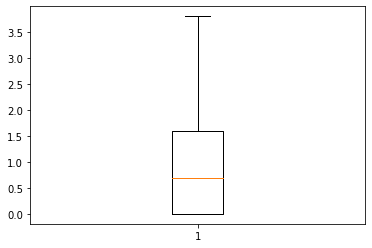

In [53]:
q3=data_cleaned["oldpeak"].quantile(q=0.75)
q1=data_cleaned["oldpeak"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column oldpeak :",IQR_upper_limit)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=data_cleaned[data_cleaned["oldpeak"]>IQR_upper_limit]
print("outliers on right side in oldpeak is \n",k1["oldpeak"],"\n")
data_cleaned=data_cleaned[data_cleaned["oldpeak"]<IQR_upper_limit]
plt.boxplot(data_cleaned["oldpeak"])

###  Removing outliers from column thalach

IQR_lower_limit for column oldpeak : 78
outliers on left side in thalach is 
 267    71
296    71
378    71
559    71
Name: thalach, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x20efb40ea60>,
 'caps': [<matplotlib.lines.Line2D at 0x20efb40e160>,
 'boxes': [<matplotlib.lines.Line2D at 0x20efb40e3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20efb45cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x20efb45cb20>],
 'means': []}

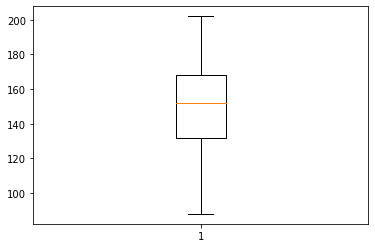

In [54]:
q3=data_cleaned["thalach"].quantile(q=0.75)
q1=data_cleaned["thalach"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=data_cleaned[data_cleaned["thalach"]<IQR_lower_limit]
print("outliers on left side in thalach is \n",k1["thalach"],"\n")
data_cleaned=data_cleaned[data_cleaned["thalach"]>IQR_lower_limit]
plt.boxplot(data_cleaned["thalach"])

### now checking  again outliers in rest of the columns 

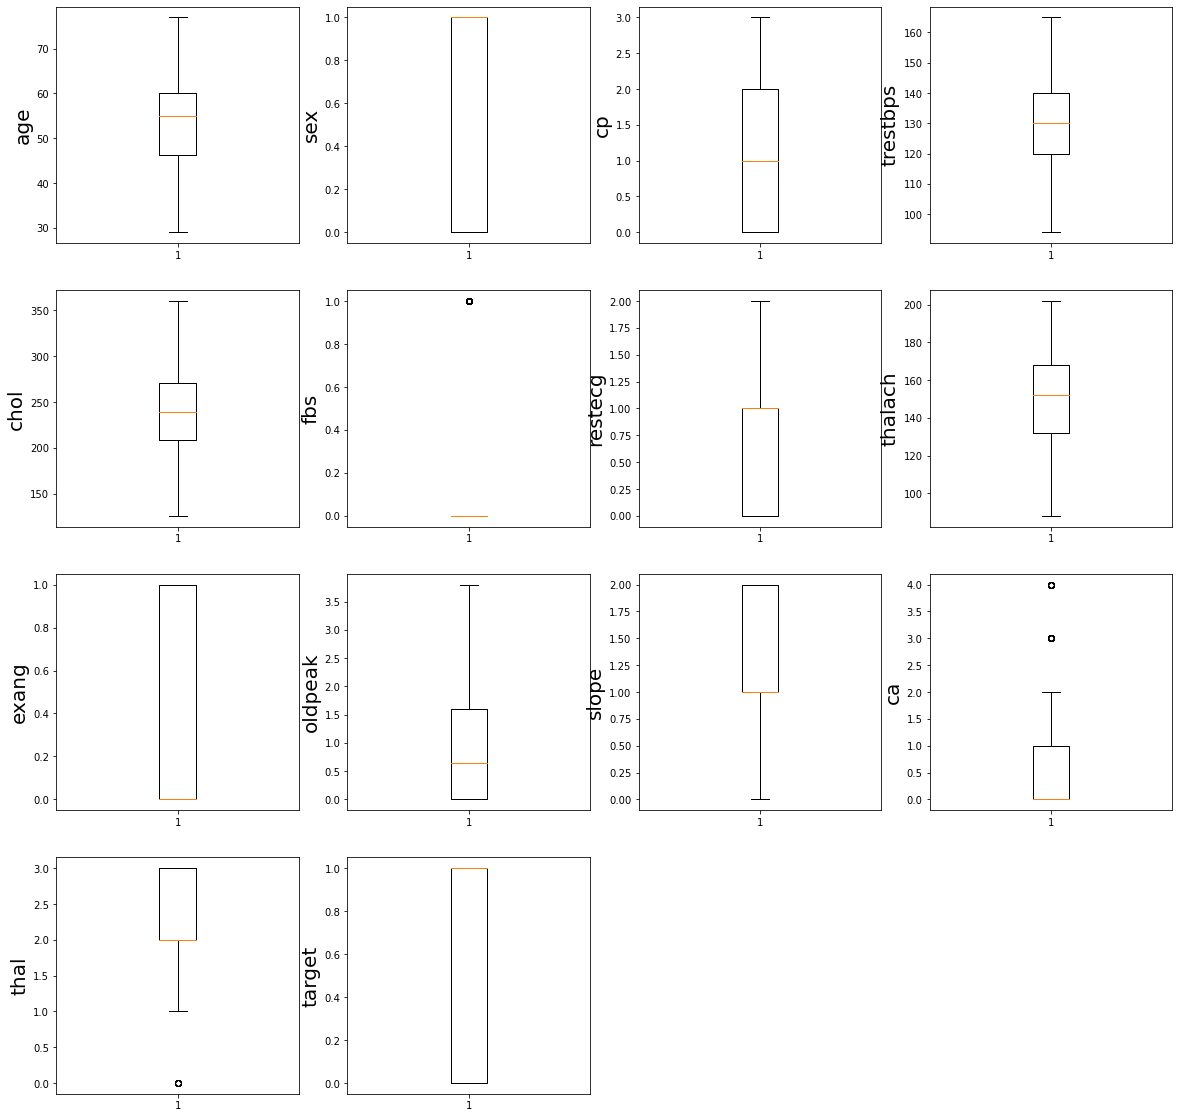

In [55]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data_cleaned.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(data_cleaned[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### shape of data 

In [56]:
data_cleaned.shape

(942, 14)

### after removing outliers data size has been reduced 

### 4.4 Checking relationship of features with target and with each other using scatter pair plot

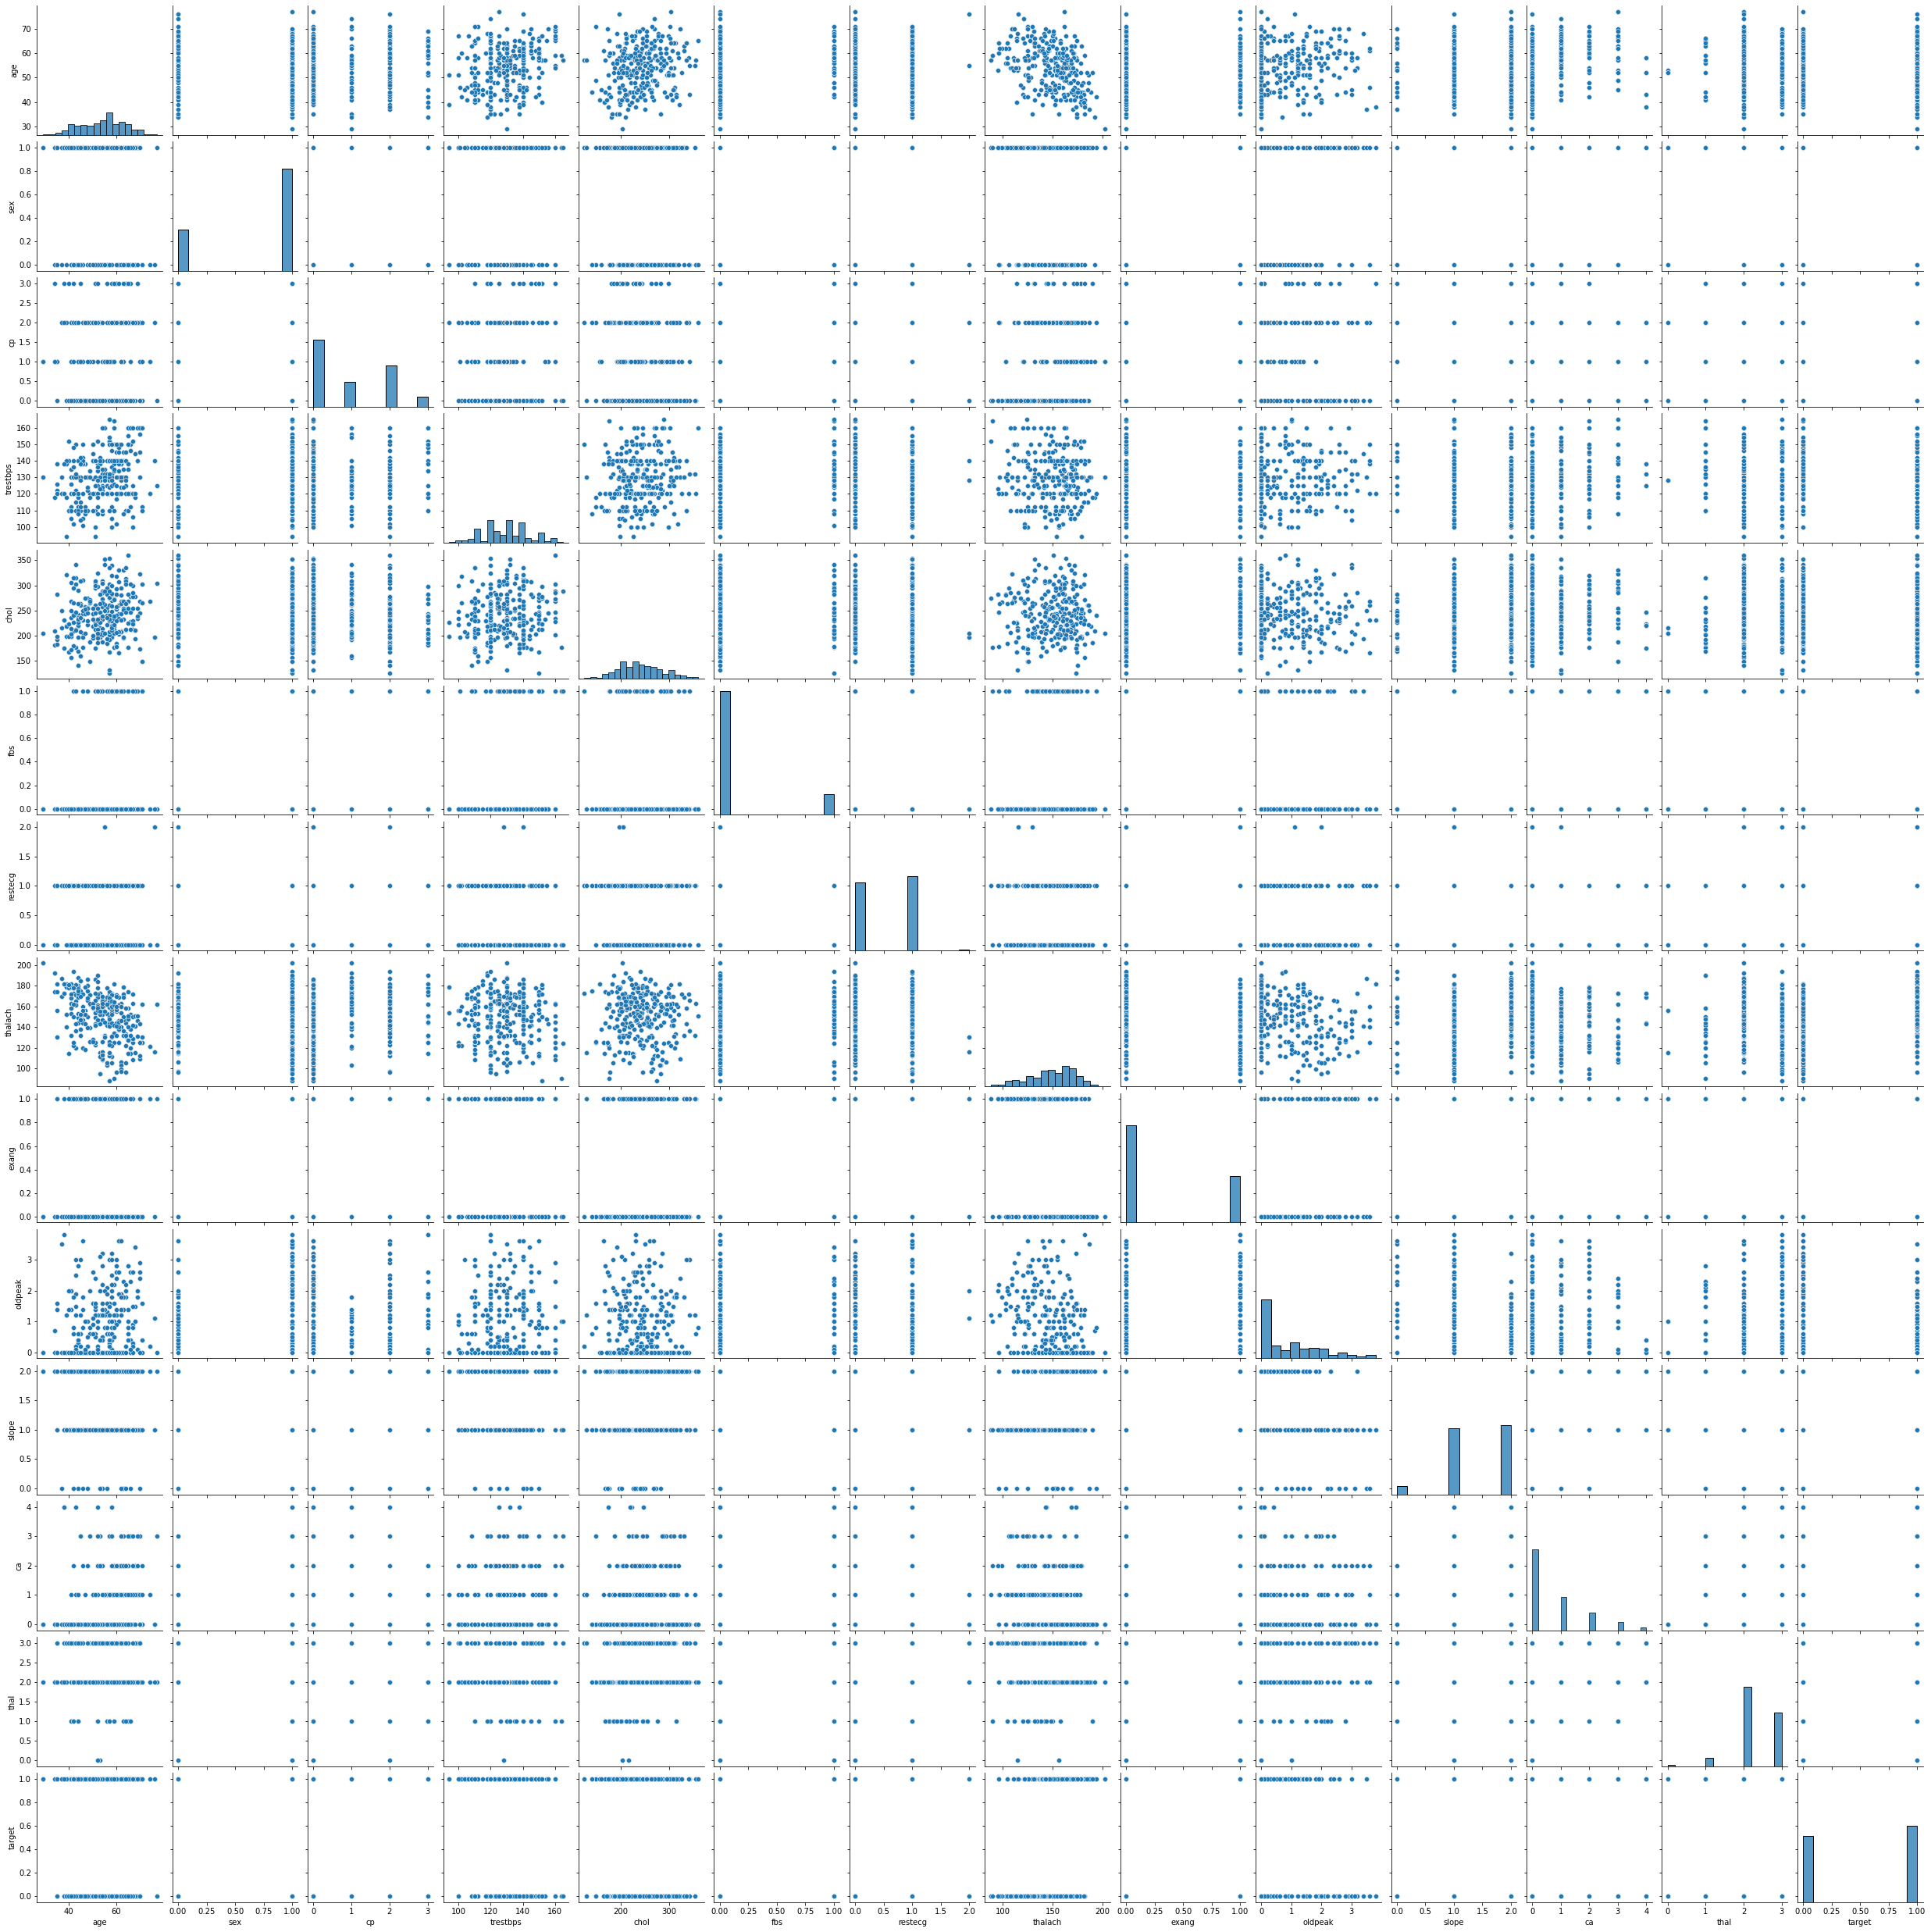

In [57]:
sns.pairplot(data_cleaned)




- Multicollinearity

from above output we can say that none of the features is highly correlated with target variable 

### 4.5 Check multicollinearity

For multicoolinearity we need to do scaling on features so first seggregate features and target as follows 

In [58]:
x=data_cleaned.drop(columns=["target"])
x  ## features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [59]:
y=data_cleaned["target"]
y  ## target variable

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 942, dtype: int64

### scaling the features 

In [60]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-0.2104257 ,  0.63551146, -0.94554924, ...,  0.96318158,
         1.25744105,  1.13970303],
       [-0.10157287,  0.63551146, -0.94554924, ..., -2.38485181,
        -0.72168922,  1.13970303],
       [ 1.7489253 ,  0.63551146, -0.94554924, ..., -2.38485181,
        -0.72168922,  1.13970303],
       ...,
       [-0.75468987,  0.63551146, -0.94554924, ..., -0.71083511,
         0.26787591, -0.49439173],
       [-0.42813137, -1.57353575, -0.94554924, ...,  0.96318158,
        -0.72168922, -0.49439173],
       [ 0.00727997,  0.63551146, -0.94554924, ..., -0.71083511,
         0.26787591,  1.13970303]])

In [61]:
### computing variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.420976,age
1,1.174680,sex
2,1.273716,cp
3,1.111318,trestbps
4,1.126242,chol
5,1.070486,fbs
6,1.080865,restecg
7,1.643905,thalach
8,1.436146,exang
9,1.594000,oldpeak


### here vif of all features are less than 5 so it means that no multicollinearity exist so we consider all features are significant for prediction model

### 4.6 Feature scaling

In [62]:
x  ### Features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [63]:
y ### target

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 942, dtype: int64

#### Scaling of x

In [64]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

 ### Step  5 :Modelling and Model evaluation


#### Modelling using cross validation considering accuracy metrics as Model evaluation metrics since target class proportion is not imbalance

In [65]:
## Taking 3 folds
cv = KFold(n_splits=3, random_state=1, shuffle=True)


#### Using different classification supervised learning algorithms we will find the efficient Classifier Model  based on accuracy score metric

### First we are taking logisticregression, KNN and SVM as they required scaled data 

In [66]:
Model_s=[LogisticRegression(),KNeighborsClassifier(), SVC()]

In [67]:
accuracy=[]
for model in Model_s:
    scores = cross_val_score(model,x_scaled,y,scoring='accuracy',cv=cv,n_jobs=-1)
    accuracy.append(np.mean(scores))
    
    

In [68]:
Model_names=["LogisticRegession","KNN","svm"]
Model_s_evaluation = pd.DataFrame({'Model': Model_names, 'accuracy': accuracy})
Model_s_evaluation

,Model,accuracy
0,LogisticRegession,0.851380
1,KNN,0.819533
2,svm,0.918259


#### Now Taking Decisiontree, RandomForest , Adaboost ,gradientboost and xgboost Algorithms 

In [69]:
Models=[DecisionTreeClassifier(),RandomForestClassifier(), AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]

In [70]:
accuracy=[]

for model in Models:
    scores = cross_val_score(model,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
    accuracy.append(np.mean(scores))
    

In [71]:
Model_names=["Decisiontree","randomforest","adaboost","gradientboost","xgboost"]
Model_s_evaluation_ = pd.DataFrame({'Model': Model_names, 'accuracy': accuracy})
Model_s_evaluation_

,Model,accuracy
0,Decisiontree,0.990446
1,randomforest,0.987261
2,adaboost,0.908705
3,gradientboost,0.977707
4,xgboost,0.993631


In [72]:
dff_model_evaluation=pd.concat([Model_s_evaluation_,Model_s_evaluation],ignore_index=True)
dff_model_evaluation



,Model,accuracy
0,Decisiontree,0.990446
1,randomforest,0.987261
2,adaboost,0.908705
3,gradientboost,0.977707
4,xgboost,0.993631
5,LogisticRegession,0.851380
6,KNN,0.819533
7,svm,0.918259


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

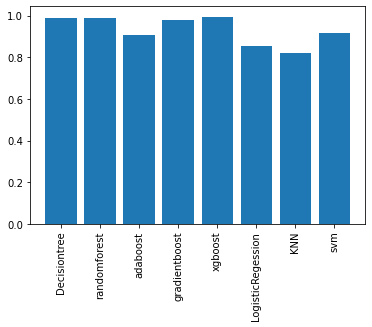

In [73]:
plt.bar(dff_model_evaluation["Model"],dff_model_evaluation["accuracy"])
plt.xticks(rotation=90)

#### Step 6:  Conclusion

We have found the hidden data insights using visualization and compare different machine learning models based on accuracy score metric and applied cross validation to get rid off overfitting problem and it is found that Decision Tree and Random Forest found efficient algorithms for this data set with accuracy 99%